Trial 0 of 100000
Trial 10000 of 100000
Trial 20000 of 100000
Trial 30000 of 100000
Trial 40000 of 100000
Trial 50000 of 100000
Trial 60000 of 100000
Trial 70000 of 100000
Trial 80000 of 100000
Trial 90000 of 100000
Trial 0 of 100000
Trial 10000 of 100000
Trial 20000 of 100000
Trial 30000 of 100000
Trial 40000 of 100000
Trial 50000 of 100000
Trial 60000 of 100000
Trial 70000 of 100000
Trial 80000 of 100000
Trial 90000 of 100000


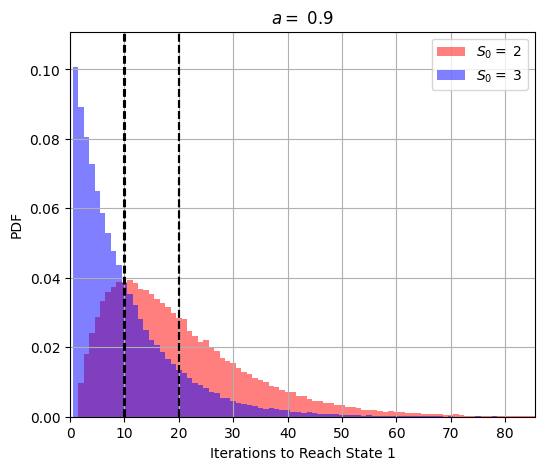

In [1]:
# Tristan Ursell
# Stochastic Markov Simulation of graph G3 for MFHTs
# April 2024
#
# Currently the transition matrix is setup to move only CW around a 3-state loop, with the parameter 'p'.
#
# Matrix P can be adjusted as desired, with rows normalized.  State 1 is set as the terminal state.
#

import numpy as np
import matplotlib.pyplot as plt

# Probability parameter in transition matrix
a = 0.9
#a = 0.25

# Transition matrix (can be modified)
P = np.array([
    [a, 1-a, 0],
    [0, a, 1-a],
    [1-a, 0, a]
])

# Number of trials
N = 100000

# Initial states (must be >0 and <= P.shape[0])
S0 = [2, 3]

# Return time vector
T = np.zeros((N, len(S0)))

# Analytical solutions (only for symmetric 3x3 graph)
b = 1 - a
c = 0
tau2 = (1-a+b) / ((1-a)**2 - b*c)
tau3 = (1-a+c) / ((1-a)**2 - b*c)

# Stochastic Trials
for k in range(len(S0)): # different starting states
    for i in range(N): # each trial
        # Initialize state
        S = S0[k]

        # Reset counter
        q = 0

        # Sample loop
        while S != 1:
            q += 1

            # Stochastic move
            cond1 = np.random.rand() < a

            # Start S = 2
            if S == 2 and not cond1:
                S = 3
                continue

            # Start S = 3
            if S == 3 and not cond1:
                S = 1
                continue

        # Return time data
        T[i, k] = q

        if i % 10000 == 0:
            print(f'Trial {i} of {N}')

# Plot histogram
plt.figure(figsize=(6, 5))
cmap1 = ['red', 'blue']
edges1 = np.arange(0.5, 101.5, 1)
xmax = 0
ymax = 0

for k in range(len(S0)):
    hist_values, bins, _ = plt.hist(T[:, k], bins=edges1, alpha=0.5, density=True, color=cmap1[k], label=f'$S_0 =$ {S0[k]}')
    
    # calculate hist x limit
    tempx = np.argmax(np.cumsum(hist_values) > 0.999)

    # Update ymax for setting limits
    xmax = max(xmax, tempx)
    ymax = max(ymax, max(hist_values))

# Compute Mean First Hitting Time (MFHT)
MFHT1 = np.mean(T, axis=0)

# Add predicted MFHTs to plot
plt.axvline(MFHT1[0], color='k', linestyle='--')
plt.axvline(MFHT1[1], color='k', linestyle='--')
plt.axvline(tau2, color='k', linestyle='--')
plt.axvline(tau3, color='k', linestyle='--')

plt.title(f'$a =$ {a}')
plt.xlabel('Iterations to Reach State 1')
plt.ylabel('PDF')
plt.legend()
plt.xlim([0, xmax + 0.5])
plt.ylim([0, 1.1*ymax])
plt.grid()

plt.savefig(f'three_state_loop_stochastic_p-{a}.svg', format='svg')
plt.show()
